## 1. **Project Overview**

### **Objective:** Students should define the project's goal or main question:
>What neighborhoods in Hamilton County have the hightest average and median taxes?

### **Data Source:** Describe where the data comes from an dhow it might answer the question.
>This data used for anaysis was downloaded from https://www.hamiltoncountyauditor.org/download/revalue/Monthly_tax_information.xlsx

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib as plt

## 2. **Data Collection and Loading**

### **Load Data:** Use Pandas to load a dataset (CSV, Excel, or database).


In [2]:
# Import dataset
tax_data = pd.read_excel('monthly_tax_information.xlsx')

- ### **Initial check:** display the first few rows and basic information about the dataset, noting column names, types, and missing values.

In [3]:
tax_data # display the data table

,parcel_number,prop_class_code,class_description,appraisal_area,area_description,location_house_number,location_street_direction,location_street_name,location_street_suffix,school_district_desc,tax_district,tax_district_desc,deeded_acreage,transfer_date,sale_amount,market_land_value,market_impr_value,total_market_value,annual_taxes
0,0010001000100,510,SINGLE FAMILY DWLG,100.0,MT WASHINGTON 00,2327,NaN,SUSSEX,AVE,CINCINNATI CSD,001,CINTI CORP-CINTI CSD,0.246,2012-11-29 00:00:00,0.0,28370.0,208420.0,236790.0,5048.88
1,0010001000200,510,SINGLE FAMILY DWLG,100.0,MT WASHINGTON 00,2319,NaN,SUSSEX,AVE,CINCINNATI CSD,001,CINTI CORP-CINTI CSD,0.265,2005-12-01 00:00:00,116000.0,28450.0,154040.0,182490.0,3890.82
2,0010001000300,510,SINGLE FAMILY DWLG,100.0,MT WASHINGTON 00,2270,NaN,SUFFOLK,CR,CINCINNATI CSD,001,CINTI CORP-CINTI CSD,0.214,2021-01-08 00:00:00,185000.0,26910.0,158090.0,185000.0,4010.35
3,0010001000400,510,SINGLE FAMILY DWLG,100.0,MT WASHINGTON 00,2266,NaN,SUFFOLK,ST,CINCINNATI CSD,001,CINTI CORP-CINTI CSD,0.214,2020-04-13 00:00:00,91500.0,29700.0,91290.0,120990.0,2701.66
4,0010001000500,510,SINGLE FAMILY DWLG,100.0,MT WASHINGTON 00,2262,NaN,SUFFOLK,ST,CINCINNATI CSD,001,CINTI CORP-CINTI CSD,0.305,1978-03-24 00:00:00,0.0,30800.0,122900.0,153700.0,2739.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355489,6710030021600,640,MUNICIPALITY OWNED,67106.0,READING 06,NaN,NaN,HUNT,RD,READING CSD,182,READING-READING CSD,0.01,1982-03-01 00:00:00,0.0,0.0,0.0,0.0,NaN
355490,6710030021700,640,MUNICIPALITY OWNED,67106.0,READING 06,NaN,NaN,WAXWING,DR,READING CSD,182,READING-READING CSD,0.609,1994-02-11 00:00:00,0.0,17240.0,0.0,17240.0,NaN
355491,6710030021800,500,RESIDENTIAL VACANT LAND,67101.0,READING 01,NaN,NaN,HUNT,RD,READING CSD,182,READING-READING CSD,0.74,2019-01-10 00:00:00,0.0,14280.0,0.0,14280.0,271.02
355492,6710030021900,500,RESIDENTIAL VACANT LAND,67106.0,READING 06,NaN,S,KATHWOOD,CR,READING CSD,182,READING-READING CSD,0.1328,2019-01-10 00:00:00,0.0,8880.0,0.0,8880.0,168.58


In [4]:
tax_data.info() # basic information about the dataset, noting column names, types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355494 entries, 0 to 355493
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   parcel_number              355494 non-null  object 
 1   prop_class_code            355494 non-null  int64  
 2   class_description          355494 non-null  object 
 3   appraisal_area             355191 non-null  float64
 4   area_description           355191 non-null  object 
 5   location_house_number      323989 non-null  object 
 6   location_street_direction  14916 non-null   object 
 7   location_street_name       354047 non-null  object 
 8   location_street_suffix     349705 non-null  object 
 9   school_district_desc       355493 non-null  object 
 10  tax_district               355494 non-null  object 
 11  tax_district_desc          355494 non-null  object 
 12  deeded_acreage             355494 non-null  object 
 13  transfer_date              35

In [5]:
tax_data_missing = tax_data.isnull().any() # Check for each column to determine if missing values.
tax_data_missing

parcel_number                False
prop_class_code              False
class_description            False
appraisal_area                True
area_description              True
location_house_number         True
location_street_direction     True
location_street_name          True
location_street_suffix        True
school_district_desc          True
tax_district                 False
tax_district_desc            False
deeded_acreage               False
transfer_date                 True
sale_amount                   True
market_land_value             True
market_impr_value             True
total_market_value            True
annual_taxes                  True
dtype: bool

### **Selection Options:** Choose which columns or data to focus on and drop the rest.

In [6]:
#Create subset where only columns of interest apply.
columns_to_keep = ['parcel_number',
                'prop_class_code',
                'class_description',
                'annual_taxes',
                'total_market_value',
                'tax_district_desc',
                'tax_district', 
]
single_family = tax_data[columns_to_keep]
single_family

,parcel_number,prop_class_code,class_description,annual_taxes,total_market_value,tax_district_desc,tax_district
0,0010001000100,510,SINGLE FAMILY DWLG,5048.88,236790.0,CINTI CORP-CINTI CSD,001
1,0010001000200,510,SINGLE FAMILY DWLG,3890.82,182490.0,CINTI CORP-CINTI CSD,001
2,0010001000300,510,SINGLE FAMILY DWLG,4010.35,185000.0,CINTI CORP-CINTI CSD,001
3,0010001000400,510,SINGLE FAMILY DWLG,2701.66,120990.0,CINTI CORP-CINTI CSD,001
4,0010001000500,510,SINGLE FAMILY DWLG,2739.71,153700.0,CINTI CORP-CINTI CSD,001
...,...,...,...,...,...,...,...
355489,6710030021600,640,MUNICIPALITY OWNED,NaN,0.0,READING-READING CSD,182
355490,6710030021700,640,MUNICIPALITY OWNED,NaN,17240.0,READING-READING CSD,182
355491,6710030021800,500,RESIDENTIAL VACANT LAND,271.02,14280.0,READING-READING CSD,182
355492,6710030021900,500,RESIDENTIAL VACANT LAND,168.58,8880.0,READING-READING CSD,182


In [7]:
#Filter data to property class code of 510 - Single Family dwellings
single_family = single_family[single_family['class_description'] == 'SINGLE FAMILY DWLG']
single_family

,parcel_number,prop_class_code,class_description,annual_taxes,total_market_value,tax_district_desc,tax_district
0,0010001000100,510,SINGLE FAMILY DWLG,5048.88,236790.0,CINTI CORP-CINTI CSD,001
1,0010001000200,510,SINGLE FAMILY DWLG,3890.82,182490.0,CINTI CORP-CINTI CSD,001
2,0010001000300,510,SINGLE FAMILY DWLG,4010.35,185000.0,CINTI CORP-CINTI CSD,001
3,0010001000400,510,SINGLE FAMILY DWLG,2701.66,120990.0,CINTI CORP-CINTI CSD,001
4,0010001000500,510,SINGLE FAMILY DWLG,2739.71,153700.0,CINTI CORP-CINTI CSD,001
...,...,...,...,...,...,...,...
355477,6710030020100,510,SINGLE FAMILY DWLG,4216.40,229300.0,READING-READING CSD,182
355478,6710030020200,510,SINGLE FAMILY DWLG,3718.52,228710.0,READING-READING CSD,182
355479,6710030020300,510,SINGLE FAMILY DWLG,3737.94,229770.0,READING-READING CSD,182
355480,6710030020400,510,SINGLE FAMILY DWLG,4781.26,260000.0,READING-READING CSD,182


In [8]:
single_family.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213801 entries, 0 to 355484
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   parcel_number       213801 non-null  object 
 1   prop_class_code     213801 non-null  int64  
 2   class_description   213801 non-null  object 
 3   annual_taxes        213441 non-null  float64
 4   total_market_value  213523 non-null  float64
 5   tax_district_desc   213801 non-null  object 
 6   tax_district        213801 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 13.0+ MB


## 3. **Data Cleaning and Preparation**

### **Handle Missing Values:** Choose how to handle missing values (drop, fill, or leave as is). Explain why you did this drop, fill, etc.

In [9]:
# Check if any column has missing values
single_family_any_missing = single_family.isnull().any()
single_family_any_missing

parcel_number         False
prop_class_code       False
class_description     False
annual_taxes           True
total_market_value     True
tax_district_desc     False
tax_district          False
dtype: bool

 >Drop rows where annual taxes are null to ensure that analysis is only based on single family dwellings that have tax to pay.

In [10]:
single_family = single_family[single_family['annual_taxes'].notnull() & single_family['total_market_value'].notnull()]
single_family

,parcel_number,prop_class_code,class_description,annual_taxes,total_market_value,tax_district_desc,tax_district
0,0010001000100,510,SINGLE FAMILY DWLG,5048.88,236790.0,CINTI CORP-CINTI CSD,001
1,0010001000200,510,SINGLE FAMILY DWLG,3890.82,182490.0,CINTI CORP-CINTI CSD,001
2,0010001000300,510,SINGLE FAMILY DWLG,4010.35,185000.0,CINTI CORP-CINTI CSD,001
3,0010001000400,510,SINGLE FAMILY DWLG,2701.66,120990.0,CINTI CORP-CINTI CSD,001
4,0010001000500,510,SINGLE FAMILY DWLG,2739.71,153700.0,CINTI CORP-CINTI CSD,001
...,...,...,...,...,...,...,...
355477,6710030020100,510,SINGLE FAMILY DWLG,4216.40,229300.0,READING-READING CSD,182
355478,6710030020200,510,SINGLE FAMILY DWLG,3718.52,228710.0,READING-READING CSD,182
355479,6710030020300,510,SINGLE FAMILY DWLG,3737.94,229770.0,READING-READING CSD,182
355480,6710030020400,510,SINGLE FAMILY DWLG,4781.26,260000.0,READING-READING CSD,182


- ### **Data Type Adjustments:** Convert columns to appropriate types (e.g., dates to datetime).


In [11]:
single_family.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213436 entries, 0 to 355484
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   parcel_number       213436 non-null  object 
 1   prop_class_code     213436 non-null  int64  
 2   class_description   213436 non-null  object 
 3   annual_taxes        213436 non-null  float64
 4   total_market_value  213436 non-null  float64
 5   tax_district_desc   213436 non-null  object 
 6   tax_district        213436 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 13.0+ MB


In [12]:
# Ensure data types
single_family_dtypes = {'parcel_number' : 'string', 
                        'prop_class_code' : 'string',
                        'class_description' : 'string',
                        'tax_district_desc' : 'string', 
                        'tax_district': 'string'
                        }
single_family = single_family.astype(single_family_dtypes)
single_family.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213436 entries, 0 to 355484
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   parcel_number       213436 non-null  string 
 1   prop_class_code     213436 non-null  string 
 2   class_description   213436 non-null  string 
 3   annual_taxes        213436 non-null  float64
 4   total_market_value  213436 non-null  float64
 5   tax_district_desc   213436 non-null  string 
 6   tax_district        213436 non-null  string 
dtypes: float64(2), string(5)
memory usage: 13.0 MB


 - **Feature Engineering:** Create at least one new feature from existing data.
     - **Example:** Group ages or scores into categories (e.g., ‘Child’, ‘Adult’, ‘Senior’) or Extract year, month, day, or weekday from a date column.
     - Calculate the percentage
     - Combine first and last name columns into a full name column


In [13]:
# Create new column 'percent_of_market' to find highest taxes as a percentage of the property market value.
single_family['percent_of_market'] = ((single_family['annual_taxes'] / single_family['total_market_value']) * 100).fillna(0)
single_family.head(1)


,parcel_number,prop_class_code,class_description,annual_taxes,total_market_value,tax_district_desc,tax_district,percent_of_market
0,0010001000100,510,SINGLE FAMILY DWLG,5048.88,236790.0,CINTI CORP-CINTI CSD,001,2.132218


In [14]:
def clean_column_names(taxes) -> pd.DataFrame:
    # Clean column names
    taxes.columns = taxes.columns.str.title()
    taxes.columns = taxes.columns.str.strip().str.replace('_', ' ')

    return taxes

# Call function to clean data
single_family_cleaned = clean_column_names(single_family).reset_index(drop = True)
single_family_cleaned.head(5)

,Parcel Number,Prop Class Code,Class Description,Annual Taxes,Total Market Value,Tax District Desc,Tax District,Percent Of Market
0,0010001000100,510,SINGLE FAMILY DWLG,5048.88,236790.0,CINTI CORP-CINTI CSD,001,2.132218
1,0010001000200,510,SINGLE FAMILY DWLG,3890.82,182490.0,CINTI CORP-CINTI CSD,001,2.132073
2,0010001000300,510,SINGLE FAMILY DWLG,4010.35,185000.0,CINTI CORP-CINTI CSD,001,2.167757
3,0010001000400,510,SINGLE FAMILY DWLG,2701.66,120990.0,CINTI CORP-CINTI CSD,001,2.232961
4,0010001000500,510,SINGLE FAMILY DWLG,2739.71,153700.0,CINTI CORP-CINTI CSD,001,1.782505


## 4. **Exploratory Data Analysis (EDA)**

### **Descriptive Statistics:** Provide summary statistics (mean, median, min, max) for numerical columns.

In [15]:
single_family_cleaned.describe()

,Annual Taxes,Total Market Value,Percent Of Market
count,213436.000000,2.134360e+05,213436.000000
mean,5049.726145,2.720468e+05,1.930162
std,4300.337821,2.600883e+05,0.411734
min,0.000000,1.500000e+02,0.000000
25%,2724.507500,1.415700e+05,1.779199
50%,3861.710000,2.008900e+05,1.961566
75%,5955.937500,3.185000e+05,2.142758
max,168976.500000,1.308715e+07,59.849214


In [16]:
def summarize_single_family(single_family_cleaned) -> str:

    # Calculate total, mean, and median
    single_sum = single_family_cleaned['Annual Taxes'].sum()
    single_mean = single_family_cleaned['Annual Taxes'].mean().round(2)
    single_median = single_family_cleaned['Annual Taxes'].median()

    # Return a formatted string
    return (f"The sum of Single Family Dwelling Annual Taxes is ${single_sum}.\n"
            f"The mean of Single Family Dwelling Annual Taxes is ${single_mean}.\n"
            f"The median of Single Family Dwelling Annual Taxes is ${single_median}.")

print(summarize_single_family(single_family_cleaned))

The sum of Single Family Dwelling Annual Taxes is $1077793349.51.
The mean of Single Family Dwelling Annual Taxes is $5049.73.
The median of Single Family Dwelling Annual Taxes is $3861.71.


### Data Visualizations:
- **Required:** One visualization (e.g., line plot) if time-series data is relevant.
- **Optional:** Additional visuals like bar charts for comparisons, histograms for distributions, or scatter plots for relationships.

In [17]:
# Group by 'Location' and calculate the min, max, mean, and median of 'Annual Taxes'
summary_stats = single_family_cleaned.groupby('Tax District Desc')['Annual Taxes'].agg(['min', 'max', 'mean', 'median'])

# Sort by median values
summary_stats_sorted = summary_stats.sort_values(by = 'median', ascending = False)
summary_stats = summary_stats_sorted.reset_index()
summary_stats

,Tax District Desc,min,max,mean,median
0,INDIAN HILL-MARIEMONT,22366.20,31809.80,28607.373333,31646.12
1,INDIAN HILL-SYMME-IND HL,26465.72,26465.72,26465.720000,26465.72
2,WYOMING-SPRGFLD-FINNYTWN,20384.88,20384.88,20384.880000,20384.88
3,INDIAN HILL-INDIAN HILL,1059.48,168976.50,19404.970620,17164.84
4,CLEVES-MIAMI-THREE RIVERS,16961.62,16961.62,16961.620000,16961.62
...,...,...,...,...,...
89,ELMWOOD PL-ST.BERNARD,4.06,25513.72,1675.130225,1513.47
90,COLUMBIA-KENW-IND.HL SD,1500.83,1500.83,1500.830000,1500.83
91,FAIRFAX-CINTI,1469.91,1469.91,1469.910000,1469.91
92,WYOMING-CINTI CSD,1156.98,1156.98,1156.980000,1156.98


In [18]:
summary_stats_median = summary_stats[['Tax District Desc', 'median']]
summary_stats_median

,Tax District Desc,median
0,INDIAN HILL-MARIEMONT,31646.12
1,INDIAN HILL-SYMME-IND HL,26465.72
2,WYOMING-SPRGFLD-FINNYTWN,20384.88
3,INDIAN HILL-INDIAN HILL,17164.84
4,CLEVES-MIAMI-THREE RIVERS,16961.62
...,...,...
89,ELMWOOD PL-ST.BERNARD,1513.47
90,COLUMBIA-KENW-IND.HL SD,1500.83
91,FAIRFAX-CINTI,1469.91
92,WYOMING-CINTI CSD,1156.98


[Text(0.5, 0, 'Tax District Description'), Text(0, 0.5, 'Median Tax Bill')]

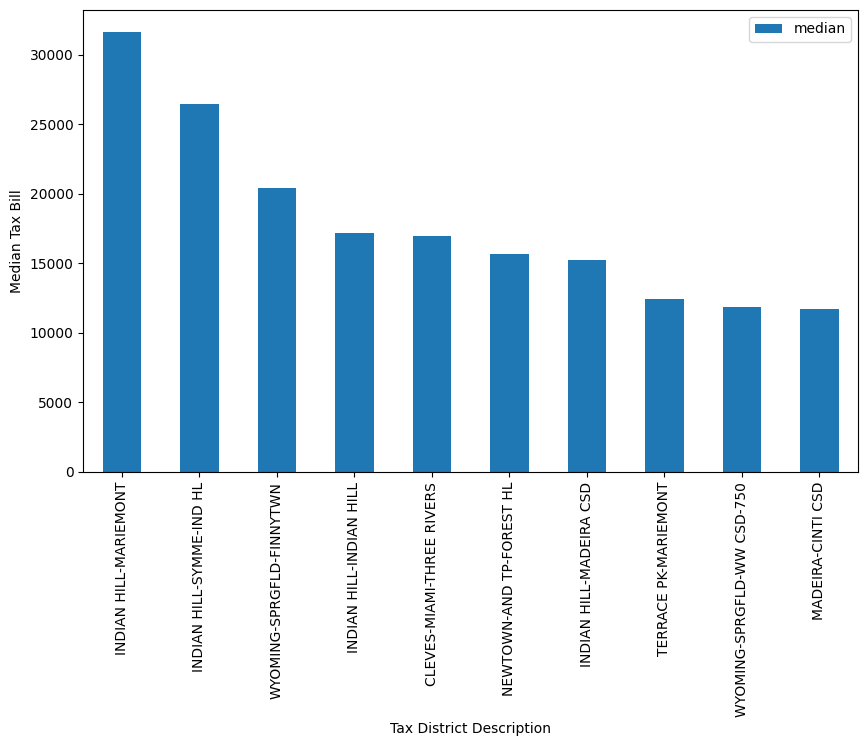

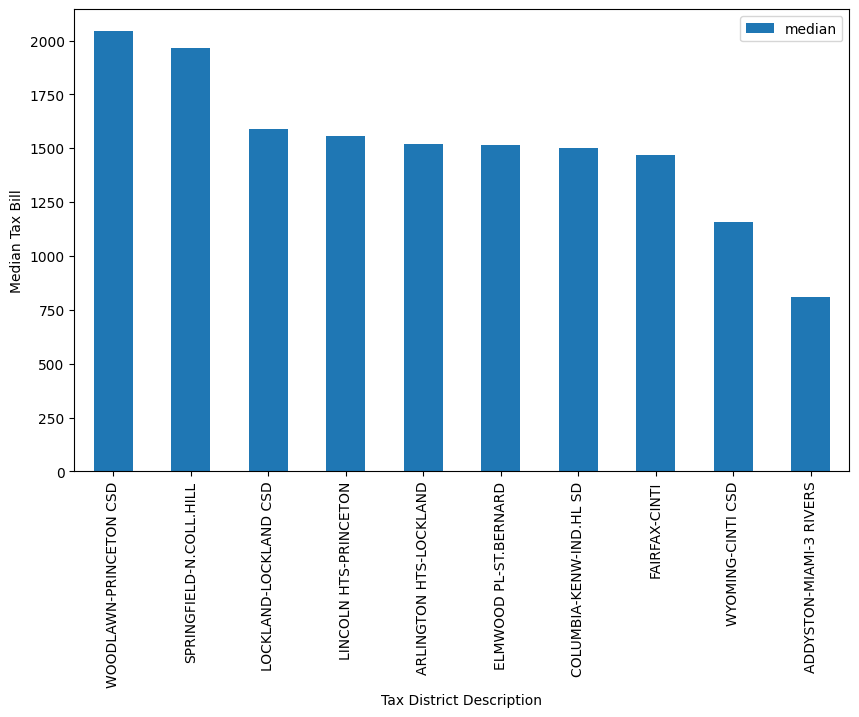

In [19]:
# # Plot for top 10 and bottom 10 median total tax bill values
summary_stats_median_plot_head = summary_stats_median.head(10)
summary_stats_median_plot_tail = summary_stats_median.tail(10)

# Set the x-axis label as 'Tax District Description' and the y-axis label as 'Median Tax Bill'

summary_stats_median_plot_head.plot(
    kind = 'bar', 
    x = 'Tax District Desc', 
    y = 'median', 
    rot = 90, 
    figsize = (10,6)
).set(
    xlabel='Tax District Description', 
    ylabel='Median Tax Bill'
)

# Set the x-axis label as 'Tax District Description' and the y-axis label as 'Median Tax Bill'
summary_stats_median_plot_tail.plot(
    kind = 'bar', 
    x = 'Tax District Desc', 
    y = 'median', 
    rot = 90, 
    figsize = (10,6)
).set(
    xlabel='Tax District Description', 
    ylabel='Median Tax Bill'
)

## 5. **Analysis and Insights**
### **Findings:** Summarize any patterns observed and address the main project question. State your findings in a markdown cell
### **Supporting Data:** Reference specific statistics or plot features to back up findings.
>Based on these results, we can see that the median tax bill for the top 10 tax districts is significantly higher than the median tax bill for the bottom 10 tax districts. This information can be useful for property owners and potential buyers to understand the tax implications in different tax districts.

## 6. **Conclusion and Recommendations (10 points)**
### Summarize: Present the main conclusions drawn from the analysis.
>Individuals considering a move to a single-family household in Hamilton County Ohio may wish to consider the tax implications of the neighborhood to which they are consindering relocating. The tax bill alone is not necessarily a reflection of affordability; however, if a neighborhood has higher median taxes, that generally will mean that neighborhood also will reflect higher median home value. 
### Recommendations: Based on findings, suggest actions or further analysis.
>Many factors may determine where an individual may choose to live or purchase a home. When looking at median tax bills for single family households in Hamilton County, Ohio, the ten neighborhoods (tax districts) with the highest median taxes are:

In [26]:
summary_stats_median_plot_head['Tax District Desc']

0         INDIAN HILL-MARIEMONT
1      INDIAN HILL-SYMME-IND HL
2      WYOMING-SPRGFLD-FINNYTWN
3       INDIAN HILL-INDIAN HILL
4     CLEVES-MIAMI-THREE RIVERS
5      NEWTOWN-AND TP-FOREST HL
6       INDIAN HILL-MADEIRA CSD
7          TERRACE PK-MARIEMONT
8    WYOMING-SPRGFLD-WW CSD-750
9             MADEIRA-CINTI CSD
Name: Tax District Desc, dtype: string

>And the 10 neighborhoods with the lowest median tax rates are:

In [27]:
summary_stats_median_plot_tail['Tax District Desc']

84     WOODLAWN-PRINCETON CSD
85    SPRINGFIELD-N.COLL.HILL
86      LOCKLAND-LOCKLAND CSD
87      LINCOLN HTS-PRINCETON
88     ARLINGTON HTS-LOCKLAND
89      ELMWOOD PL-ST.BERNARD
90    COLUMBIA-KENW-IND.HL SD
91              FAIRFAX-CINTI
92          WYOMING-CINTI CSD
93    ADDYSTON-MIAMI-3 RIVERS
Name: Tax District Desc, dtype: string